# Prediction of Stroke in People with ML & Dataset Visualization

### Dataset: Stroke Prediction Dataset

* 11 clinical features por predicting stroke events

### Features

Attribute Information
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

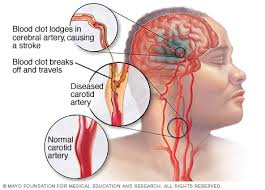

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Librires

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from warnings import filterwarnings
filterwarnings('ignore')

### Dataset Pre-processing

In [ ]:
dataset = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
dataset.head()
dataset.count()

In [ ]:
df = dataset.copy()
df = df.dropna() #Eksik gözlem ortadan kaldırılır.
df.head()

In [ ]:
df.info()

## Correlation Matris

In [ ]:
corr_data = df.corr() # Datada bulunan numerik değerler arasındaki korelasyona bakar.
sns.clustermap(corr_data,annot= True,fmt = '.2f')
#annot grafik üstündeki sayısal değerleri gösteririken fmt ise virgülden sonra kaç basamak gösterilecek bunu belirler.
plt.title('Correlation Between Features')
plt.show();

### Dependent Variable

In [ ]:
df["stroke"].value_counts() 

### Dataset Information 
*  stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
df["stroke"].value_counts().plot.barh(); #Bağımlı değişkenin incelenmesi

In [ ]:
df.describe().T

In [ ]:
#Pre-processing for training & test dataset 
y = df["stroke"] 
X = df.drop(["stroke"], axis=1)

In [ ]:
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)
X = X.drop(["smoking_status"], axis=1)
X = X.drop(["id"], axis=1)

In [ ]:
X.head()

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

In [ ]:
loj_model.intercept_

In [ ]:
loj_model.coef_

In [ ]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)

In [ ]:
accuracy_score(y, y_pred) 

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
accuracy_score(y, y_pred)

## ROC Curve

In [ ]:
loj_model.predict_proba(X)[:,1][0:5]

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

testscore_lr =accuracy_score(y_test, loj_model.predict(X_test))
accuracy_score(y_test, loj_model.predict(X_test)) #Doğrulama öncesi hata score

In [ ]:
crosscore_lr =cross_val_score(loj_model, X_test, y_test, cv = 10).mean() #CV sonrası hata
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

y_pred = nb_model.predict(X_test)
testscore_nb =   accuracy_score(y_test, y_pred) # First Test acc
accuracy_score(y_test, y_pred) # First Test acc


In [ ]:
crosscore_nb=cross_val_score(nb_model, X_test, y_test, cv = 10).mean() #Test acc after cross val.
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() #Test acc after cross val.

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

y_pred = knn_model.predict(X_test)

testscore_knn =accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Model Tuning For KNN

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

In [ ]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_)) #Bu skor train setindeki accdir

In [ ]:
knn = KNeighborsClassifier(12)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)#Test setindeki valide edilmiş acc

In [ ]:
y_pred = knn_tuned.predict(X_test)
crosscore_knn=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Support Vector Machine

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

testscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred) #test acc

## Model Tuning

In [ ]:
svc_params = {"C": np.arange(1,5)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

### Non-Linear SVM & Radial Basis Function

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
testscore_nonsvm=accuracy_score(y_test, y_pred) 
accuracy_score(y_test, y_pred) 

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(C = 0.0001, gamma = 0.0001).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
crosscore_nonsvm=accuracy_score(y_test, y_pred) #Tuning acc
accuracy_score(y_test, y_pred) #Tuning acc

### Artificial Neural Networks

In [ ]:

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() # it needs standardization for ANN

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

y_pred = mlpc.predict(X_test_scaled)

testscore_mlpc=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
### Tuning YSA

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

In [ ]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

In [ ]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (5, 3),
                          solver = "sgd")

In [ ]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred = mlpc_tuned.predict(X_test_scaled)
crosscore_mlpc=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
#Model Tunning

cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

print("En iyi parametreler: " + str(cart_cv_model.best_params_))

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
testscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
#Model Tuniing

rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 5)

rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
crosscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level of Features ")

## Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
testscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
### Model Tuning

gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

print("The Best Parameters: " + str(gbm_cv.best_params_))

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.001, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(X_train,y_train)
y_pred = gbm_tuned.predict(X_test)
crosscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## XGB Classifier

In [ ]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
testscore_xgb=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Model Tuning 

In [ ]:


xgb_params = {
        'n_estimators': [100, 500],
        'subsample': [0.6, 0.8],
        'max_depth': [3, 4,],
        'learning_rate': [0.1,0.01,]}
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2)

xgb_cv_model.fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    n_estimators = 500,
                    subsample = 0.6)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
crosscore_xgb=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Light GBM

In [ ]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
testscore_lgbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

### Model Tuning


In [ ]:

lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

lgbm_cv_model.fit(X_train, y_train)


In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)

lgbm_tuned = lgbm.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
crosscore_lgbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

## Results

In [ ]:
modeller_name=['LR','NB','KNN', 'SVC', 'Non-SVC','ANN','CART', 'RF','GradientBoosting','XGBC','LGBM']
model_Test=[testscore_lr,testscore_nb,testscore_knn,testscore_svm,testscore_nonsvm,testscore_mlpc,testscore_cart,testscore_rf,testscore_gbm,testscore_xgb,testscore_lgbm]
model_Croos=[crosscore_lr,crosscore_nb,crosscore_knn,crosscore_svm,crosscore_nonsvm,crosscore_mlpc,crosscore_cart,crosscore_rf,crosscore_gbm,crosscore_xgb,crosscore_lgbm]
#creating line1

line1= go.Scatter(
    x = modeller_name, # x axis
    y = model_Test, # y axis
    mode = "markers", #type of plot
    name = "Test Scores", # name of the plots
    marker = dict(color = 'rgba(167,150,55,0.8)'), #color + opacity
    text = modeller_name # hover text
)

#cretaing line2
line2= go.Scatter(
    x = modeller_name,
    y = model_Croos,
    mode = 'lines+markers',
    name = "Cross Valid Scores",
    marker = dict(color = 'rgba(95,26,80,0.8)'),
    text = modeller_name
) 

data = [line1,line2]

layout= dict(title= 'Comparison of Test & Cross Validation Scores',              
             xaxis= dict(title= 'ML Methods',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)

# If you like this kernel, Please Upvote :) Thanks

![image.gif](https://yyb7613mjr31k8vxr4692ftk-wpengine.netdna-ssl.com/wp-content/uploads/2020/09/d6aa5176-statistics-for-data-science-courses.gif)